## S14a: Lab 2 - Pricing, houses


### 1. Let's start by reading in our data

In [4]:
# Imports

import numpy as np
import pandas as pd

In [5]:
# Read in data with pandas

data = pd.read_csv('./data/Boston_March2018.csv')

# Preview

data.head()    # head - first 5 rows 
# data.tail()  # tail - last 5 rows 


,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
2,72080286,SLD,2999999.0,2950000.0,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101


In [6]:
data.head (2)

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522


In [7]:
np.shape(data)

(5171, 38)

In [8]:
data.shape

(5171, 38)

In [9]:
data.columns

Index(['MLSNUM', 'STATUS', 'LISTPRICE', 'SOLDPRICE', 'LISTDATE', 'SOLDDATE',
       'EXPIREDDATE', 'DOM', 'DTO', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'AREA',
       'BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'AGENTNAME', 'OFFICENAME',
       'OFFICEPHONE', 'SHOWINGINSTRUCTIONS', 'REMARKS', 'STYLE', 'LEVEL',
       'GARAGE', 'HEATING', 'COOLING', 'ELEMENTARYSCHOOL', 'JUNIORHIGHSCHOOL',
       'HIGHSCHOOL', 'OTHERFEATURES', 'PROPTYPE', 'STREETNAME', 'HOUSENUM1',
       'HOUSENUM2', 'PHOTOURL'],
      dtype='object')

In [10]:
data.iloc[4000:].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
4000,72223804,SLD,479000.0,460000.0,9/6/2017,3/29/2018,NaN,139,125,122 Cardinal Way,...,NaN,Finn Ryan Elem,JFKMS,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Cardinal Way,122,122,http://media.mlspin.com/photo.aspx?mls=72223804
4001,72223856,SLD,289999.0,289000.0,9/6/2017,3/30/2018,NaN,181,181,4 George Frost Dr,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,George Frost Dr,4,4,http://media.mlspin.com/photo.aspx?mls=72223856
4002,72224217,SLD,325000.0,326000.0,9/6/2017,3/30/2018,NaN,181,166,14 Harrington Ave,...,NaN,Thoreau,CMS,CCHS,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,CC,Harrington Ave,14,14,http://media.mlspin.com/photo.aspx?mls=72224217
4003,72224258,SLD,417000.0,402500.0,9/6/2017,3/29/2018,NaN,155,140,21 Nottingham Dr,...,NaN,Kingston Elem,Kingston Middle,Silver Lake Reg,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Nottingham Dr,21,21,http://media.mlspin.com/photo.aspx?mls=72224258
4004,72224426,SLD,824900.0,785000.0,9/6/2017,3/30/2018,NaN,144,130,49 BAYBERRY,...,NaN,Cedar,HMS,HHS,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,BAYBERRY,49,49,http://media.mlspin.com/photo.aspx?mls=72224426


In [11]:
data.iloc[400:411]

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
400,72264930,SLD,339000.0,329000.0,12/18/2017,3/2/2018,NaN,41,27,69 Plain St,...,NaN,NaN,NaN,NaN,NaN,MF,Plain St,69,69,http://media.mlspin.com/photo.aspx?mls=72264930
401,72265392,SLD,239900.0,243800.0,12/20/2017,3/2/2018,NaN,30,30,57 Farrar Ave,...,NaN,NaN,NaN,NaN,NaN,MF,Farrar Ave,57,57,http://media.mlspin.com/photo.aspx?mls=72265392
402,72265427,SLD,274900.0,247000.0,12/20/2017,3/2/2018,NaN,23,23,713 Franklin Street,...,NaN,NaN,NaN,NaN,NaN,MF,Franklin Street,713,713,http://media.mlspin.com/photo.aspx?mls=72265427
403,72265443,SLD,219800.0,209500.0,12/20/2017,3/2/2018,NaN,57,42,65 Howland Rd,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Howland Rd,65,65,http://media.mlspin.com/photo.aspx?mls=72265443
404,72265794,SLD,49900.0,40000.0,12/23/2017,3/2/2018,NaN,45,45,278 Onota St,...,NaN,NaN,NaN,NaN,NaN,MF,Onota St,278,278,http://media.mlspin.com/photo.aspx?mls=72265794
405,72265946,SLD,459900.0,460000.0,12/26/2017,3/2/2018,NaN,30,16,27 Biscayne Ave,...,NaN,SHS,Belmonte,Lynnhurst,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Biscayne Ave,27,27,http://media.mlspin.com/photo.aspx?mls=72265946
406,72265995,SLD,225000.0,213900.0,12/26/2017,3/2/2018,NaN,18,18,19 Pleasant St,...,NaN,NaN,NaN,NaN,NaN,MF,Pleasant St,19,19,http://media.mlspin.com/photo.aspx?mls=72265995
407,72266305,SLD,299900.0,310000.0,12/28/2017,3/2/2018,NaN,19,5,325 Broadway,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Broadway,325,325,http://media.mlspin.com/photo.aspx?mls=72266305
408,72266544,SLD,230000.0,225500.0,12/29/2017,3/2/2018,NaN,19,5,43 Kendrick Ave,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Kendrick Ave,43,43,http://media.mlspin.com/photo.aspx?mls=72266544
409,72266848,SLD,335000.0,335000.0,1/1/2018,3/2/2018,NaN,23,6,918 Dighton Woods Circle,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Dighton Woods Circle,918,918,http://media.mlspin.com/photo.aspx?mls=72266848


In [12]:
# View from another angle

data.iloc[100:].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
100,72253657,SLD,539000.0,530000.0,11/9/2017,3/1/2018,NaN,97,33,304 Neponset,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:--;Floor:Hardwo...,CC,Neponset,304,304,http://media.mlspin.com/photo.aspx?mls=72253657
101,72255734,SLD,829000.0,787500.0,11/15/2017,3/1/2018,NaN,20,5,73 Thaxter St,...,NaN,Foster,Hingham Middle,Hingham High,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Thaxter St,73,73,http://media.mlspin.com/photo.aspx?mls=72255734
102,72255735,SLD,1799000.0,1734300.0,11/15/2017,3/1/2018,NaN,71,71,15 Dix Street Unit 2,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Dix Street Unit 2,15,15,http://media.mlspin.com/photo.aspx?mls=72255735
103,72255807,SLD,749000.0,780000.0,11/15/2017,3/1/2018,NaN,21,6,30 Spring Lane,...,NaN,Downey,Thurston,WHS,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Spring Lane,30,30,http://media.mlspin.com/photo.aspx?mls=72255807
104,72256216,SLD,619900.0,615000.0,11/16/2017,3/1/2018,NaN,32,20,73 CIRCLE DRIVE,...,NaN,Northeast,Kennedy,Waltham,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,CIRCLE DRIVE,73,73,http://media.mlspin.com/photo.aspx?mls=72256216


### 2. Explore the data

In [13]:
# Narrow the view

prices = ['LISTPRICE', 'SOLDPRICE']
data[prices].head()

,LISTPRICE,SOLDPRICE
0,239900.0,247000.0
1,338000.0,338000.0
2,2999999.0,2950000.0
3,2600000.0,2600000.0
4,525000.0,525000.0


In [14]:
data['SOLDPRICE'].head()

0     247000.0
1     338000.0
2    2950000.0
3    2600000.0
4     525000.0
Name: SOLDPRICE, dtype: float64

In [15]:
data[['SOLDPRICE']].head()  # with double [[ looks great ]]

,SOLDPRICE
0,247000.0
1,338000.0
2,2950000.0
3,2600000.0
4,525000.0


In [16]:
data [['LISTPRICE', 'SOLDPRICE']].head() # Double [[ is inportant for more than one variables - must]]
# data ['LISTPRICE', 'SOLDPRICE'].head() # this wouldn't work 

,LISTPRICE,SOLDPRICE
0,239900.0,247000.0
1,338000.0,338000.0
2,2999999.0,2950000.0
3,2600000.0,2600000.0
4,525000.0,525000.0


In [17]:
# !YOUR TURN!
# Look at sum
# data.sum(axis=0)

# Look at mean
# np.mean(data['SOLDPRICE'])


In [18]:
# data.sum(axis=0)

In [19]:
# np.mean(data)

In [20]:
data['SOLDPRICE'].values

array([ 247000.,  338000., 2950000., ...,  616500.,  369000.,  455000.])

In [21]:
soldAv = data['SOLDPRICE']
np.mean(soldAv)

476598.77463740093

In [22]:
np.mean(data['SOLDPRICE'])

476598.77463740093

In [23]:
data['PROPTYPE'].head()

0    MF
1    CC
2    SF
3    SF
4    SF
Name: PROPTYPE, dtype: object

In [24]:
data['PROPTYPE'].unique()

array(['MF', 'CC', 'SF'], dtype=object)

In [25]:
# Let's take a look at the property types

proptypes = data.PROPTYPE.unique()
proptypes

array(['MF', 'CC', 'SF'], dtype=object)

In [26]:
(data.PROPTYPE == "SF").head()

0    False
1    False
2     True
3     True
4     True
Name: PROPTYPE, dtype: bool

In [27]:
data[(data.PROPTYPE == "SF")].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
2,72080286,SLD,2999999.0,2950000.0,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101
5,72133120,SLD,468000.0,479000.0,3/20/2017,3/1/2018,NaN,273,273,27 Jennings Way,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Jennings Way,27,27,http://media.mlspin.com/photo.aspx?mls=72133120
6,72148511,SLD,209900.0,176505.0,4/19/2017,3/1/2018,NaN,311,287,26 HATHAWAY STREET,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:--;Floor:--;Appl...,SF,HATHAWAY STREET,26,26,http://media.mlspin.com/photo.aspx?mls=72148511


In [28]:
(data.SOLDPRICE < 1000000).head()

0     True
1     True
2    False
3    False
4     True
Name: SOLDPRICE, dtype: bool

In [29]:
data[(data.SOLDPRICE < 1000000)].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101
5,72133120,SLD,468000.0,479000.0,3/20/2017,3/1/2018,NaN,273,273,27 Jennings Way,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Jennings Way,27,27,http://media.mlspin.com/photo.aspx?mls=72133120
6,72148511,SLD,209900.0,176505.0,4/19/2017,3/1/2018,NaN,311,287,26 HATHAWAY STREET,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:--;Floor:--;Appl...,SF,HATHAWAY STREET,26,26,http://media.mlspin.com/photo.aspx?mls=72148511


In [30]:
# Tinker around with some filtering options

data[(data.SOLDPRICE < 1000000) & (data.PROPTYPE == "SF")].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101
5,72133120,SLD,468000.0,479000.0,3/20/2017,3/1/2018,NaN,273,273,27 Jennings Way,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Jennings Way,27,27,http://media.mlspin.com/photo.aspx?mls=72133120
6,72148511,SLD,209900.0,176505.0,4/19/2017,3/1/2018,NaN,311,287,26 HATHAWAY STREET,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:--;Floor:--;Appl...,SF,HATHAWAY STREET,26,26,http://media.mlspin.com/photo.aspx?mls=72148511
7,72153413,SLD,549900.0,530000.0,4/26/2017,3/1/2018,NaN,261,261,9 Sheffield Place,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Sheffield Place,9,9,http://media.mlspin.com/photo.aspx?mls=72153413
9,72166889,SLD,130000.0,130000.0,5/16/2017,3/1/2018,NaN,185,185,88 Marcelle St,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Marcelle St,88,88,http://media.mlspin.com/photo.aspx?mls=72166889


In [31]:
# Look at everything

data.describe()

,MLSNUM,LISTPRICE,SOLDPRICE,EXPIREDDATE,DOM,DTO,ZIP,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE,COOLING
count,5.171000e+03,5.171000e+03,5.171000e+03,0.0,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,4.064000e+03,5171.000000,0.0
mean,7.225305e+07,4.807745e+05,4.765988e+05,NaN,69.591762,48.977374,2062.584220,3.253336,2.031038,1883.277703,62.156256,4.236467e+04,0.865597,NaN
std,4.473714e+04,4.945971e+05,5.016361e+05,NaN,92.763384,68.484702,1119.135051,1.604884,1.050722,1038.769455,54.095052,3.790374e+05,0.985542,NaN
min,7.115216e+07,1.990000e+04,2.300000e+04,NaN,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,7.224754e+07,2.499000e+05,2.450000e+05,NaN,18.000000,6.000000,1747.000000,2.000000,1.500000,1191.000000,27.000000,6.000000e+03,0.000000,NaN
50%,7.226724e+07,3.748000e+05,3.700000e+05,NaN,35.000000,20.000000,2048.000000,3.000000,2.000000,1638.000000,54.000000,1.174600e+04,1.000000,NaN
75%,7.227533e+07,5.499000e+05,5.515000e+05,NaN,94.000000,73.000000,2360.000000,4.000000,2.500000,2300.000000,98.000000,2.570625e+04,2.000000,NaN
max,7.230167e+07,1.050000e+07,1.511000e+07,NaN,1562.000000,938.000000,34452.000000,32.000000,32.000000,11200.000000,1863.000000,1.868724e+07,9.000000,NaN


In [32]:
data.groupby('PROPTYPE').mean()

,MLSNUM,LISTPRICE,SOLDPRICE,EXPIREDDATE,DOM,DTO,ZIP,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE,COOLING
PROPTYPE,,,,,,,,,,,,,,
CC,7.225364e+07,512072.209661,515437.729363,NaN,54.799169,39.804017,2106.023546,2.087258,1.745845,1328.087950,49.587950,109587.963056,0.542244,NaN
MF,7.225119e+07,498397.169421,493278.811983,NaN,55.506198,41.280992,1997.479339,6.121901,2.927686,2891.136364,108.140496,8466.673120,0.520661,NaN
SF,7.225306e+07,464208.570802,456815.676056,NaN,78.280604,54.210607,2052.958680,3.344434,2.024206,1980.067838,60.889608,40438.179158,1.061055,NaN


In [33]:
# Group by prop type

data_by_proptype = data.groupby('PROPTYPE')
data_by_proptype.describe()

MLSNUM                                                      \
           count          mean           std         min         25%   
PROPTYPE                                                               
CC        1444.0  7.225364e+07  45088.556068  71836809.0  72251477.0   
MF         484.0  7.225119e+07  47702.020613  71888962.0  72246695.0   
SF        3243.0  7.225306e+07  44125.890963  71152163.0  72246143.5   

                                              LISTPRICE                 ...  \
                 50%          75%         max     count           mean  ...   
PROPTYPE                                                                ...   
CC        72270354.0  72277153.75  72296323.0    1444.0  512072.209661  ...   
MF        72266094.5  72274428.25  72294677.0     484.0  498397.169421  ...   
SF        72265821.0  72274353.00  72301673.0    3243.0  464208.570802  ...   

         GARAGE      COOLING                               
            75%  max   count mean std min 25% 50% 75% max  
PROPTYPE                                                   
CC          1.0  2.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
MF          1.0  7.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
SF          2.0  9.0     0.0  NaN NaN NaN NaN NaN NaN NaN  

[3 rows x 112 columns]

In [34]:
# Zoom in

data_by_proptype[['LISTPRICE', 'SOLDPRICE',  'BEDS', 'SQFT']].mean()

,LISTPRICE,SOLDPRICE,BEDS,SQFT
PROPTYPE,,,,
CC,512072.209661,515437.729363,2.087258,1328.087950
MF,498397.169421,493278.811983,6.121901,2891.136364
SF,464208.570802,456815.676056,3.344434,1980.067838


# 3. Introducing [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) with Scikit Learn

In [35]:
# Import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
# Define model

regr = linear_model.LinearRegression()

In [37]:
# Define label and features (adjustable)

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']


In [38]:
data[label].head()

,SOLDPRICE
0,247000.0
1,338000.0
2,2950000.0
3,2600000.0
4,525000.0


In [39]:
data[features].head()

,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE
0,12,4.0,4772,118,8350.0,0
1,2,2.0,1545,2,NaN,2
2,5,6.5,6800,10,20564.0,3
3,4,4.5,6000,1,27559.0,3
4,3,3.0,2774,28,106286.0,2


In [40]:
# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

print(filter_data[label + features].head())


   SOLDPRICE      BEDS     BATHS      SQFT       AGE   LOTSIZE    GARAGE
0   0.229297  0.666667  0.363636  0.493383  0.063339  0.000447  0.000000
1   0.513870  0.166667  0.272727  0.286807  0.015030  0.005688  0.222222
2   0.466783  0.166667  0.227273  0.206782  0.000537  0.001605  0.222222
3   0.157135  0.111111  0.090909  0.000000  0.000000  0.000000  0.000000
4   0.518989  0.166667  0.227273  0.272849  0.008052  0.001002  0.222222


In [41]:
# Extract features and label

label = filter_data[label]
features = filter_data[features]


In [42]:
label.shape, features.shape

((3838, 1), (3838, 6))

In [43]:
features[100:].head()

,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE
100,0.166667,0.181818,0.119107,0.023618,0.000000,0.000000
101,0.277778,0.181818,0.323615,0.068706,0.000930,0.000000
102,0.222222,0.136364,0.235629,0.056361,0.000457,0.111111
103,0.166667,0.090909,0.169148,0.057971,0.000186,0.000000
104,0.166667,0.090909,0.142060,0.019860,0.000347,0.000000


In [44]:
# Set up testing and training (adjustable)
split = int(len(filter_data) * 0.25)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]

# Check shapes

print ("Train shape")
print (features_train.shape, label_train.shape)
print ("\nTest shape")
print (features_test.shape, label_test.shape)

Train shape
(959, 6) (959, 1)

Test shape
(2879, 6) (2879, 1)


In [45]:
split

959

In [46]:
features[:]

,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE
0,0.666667,0.363636,0.493383,0.063339,0.000447,0.000000
1,0.166667,0.272727,0.286807,0.015030,0.005688,0.222222
2,0.166667,0.227273,0.206782,0.000537,0.001605,0.222222
3,0.111111,0.090909,0.000000,0.000000,0.000000,0.000000
4,0.166667,0.227273,0.272849,0.008052,0.001002,0.222222
...,...,...,...,...,...,...
3833,0.166667,0.227273,0.254963,0.000000,0.001072,0.333333
3834,0.111111,0.090909,0.118900,0.036500,0.000414,0.000000
3835,0.111111,0.181818,0.119520,0.026838,0.003147,0.000000
3836,0.222222,0.136364,0.187965,0.021471,0.001725,0.000000


In [47]:
# Fit training sets

regr.fit(features_train, label_train)

LinearRegression()

In [48]:
# Make predictions using testing set

label_pred = regr.predict(features_test)

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(label_test, label_pred))


Variance score: 0.29


In [49]:
label_pred

array([[0.35156518],
       [0.36515032],
       [0.32062937],
       ...,
       [0.35171891],
       [0.29884309],
       [0.5140116 ]])

### 4. Plot, aka "Visualize"

In [50]:
# Import
import matplotlib.pyplot as plt

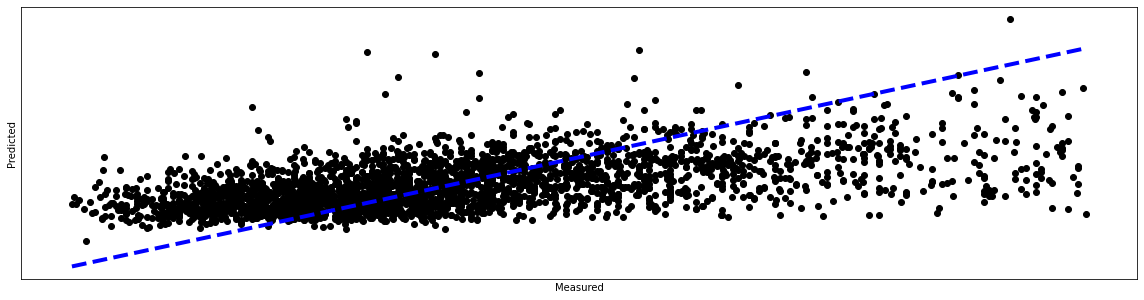

In [51]:

# Plot outputs
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

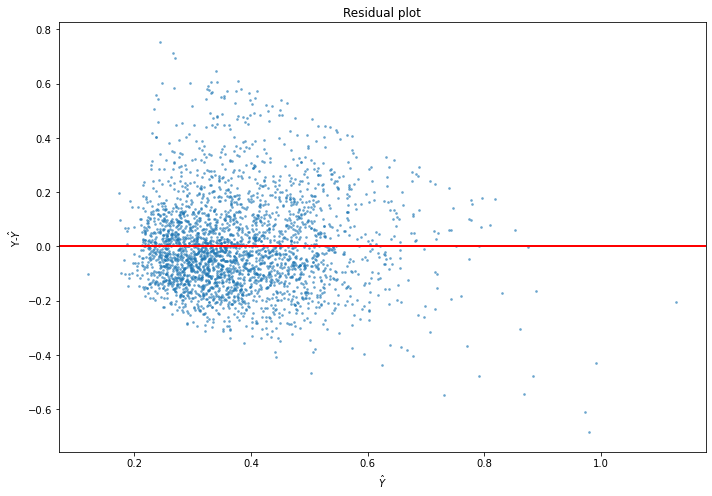

In [52]:
# Residual plot

plt.figure(figsize=(10, 7))

resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

### 7. Export

In [53]:
# Download model as pkl file

import joblib
joblib.dump(regr, 'regr_test.pkl')

['regr_test.pkl']

# HOMEWORK 1

### 6. Train Test Split

### Homework_1 _ Linear Regression 

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
y = label
X = features

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [57]:
lreg = linear_model.LinearRegression()

In [58]:
lreg.fit(X_train,y_train)

LinearRegression()

In [59]:
predictions = lreg.predict(X_test)

In [60]:
y_pred = lreg.predict(X_test)

In [61]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[-0.77944931  0.71836823  0.95746651 -0.14230169 -0.05987295  0.19577492]]


In [62]:
rmse_lm = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % rmse_lm)

Mean squared error: 0.03


In [63]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.31


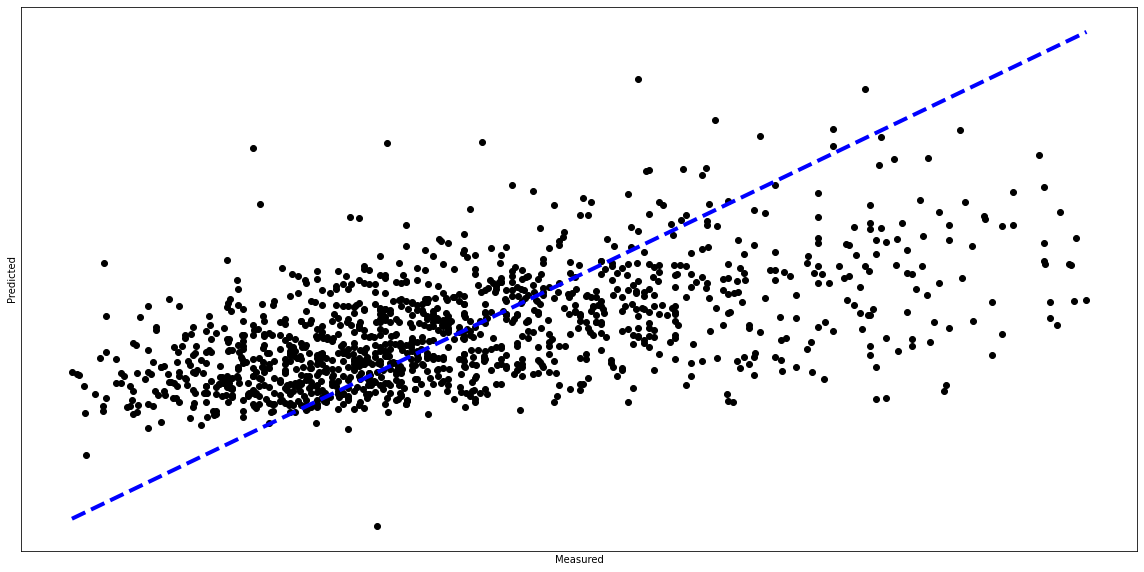

In [64]:
# Plot outputs
plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

In [65]:
import joblib
joblib.dump(lreg, 'lReg.pkl')

['lReg.pkl']

### Homework_1_DecisionTree

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1,random_state=3)

In [68]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [69]:
y_pred = dt.predict(X_test)

In [70]:
mse_dt = mean_squared_error(y_test, y_pred)

In [71]:
rmse_dt = mse_dt**(1/2)

In [72]:
print('Mean squared error: %.2f' % rmse_dt)

Mean squared error: 0.17


In [73]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.29


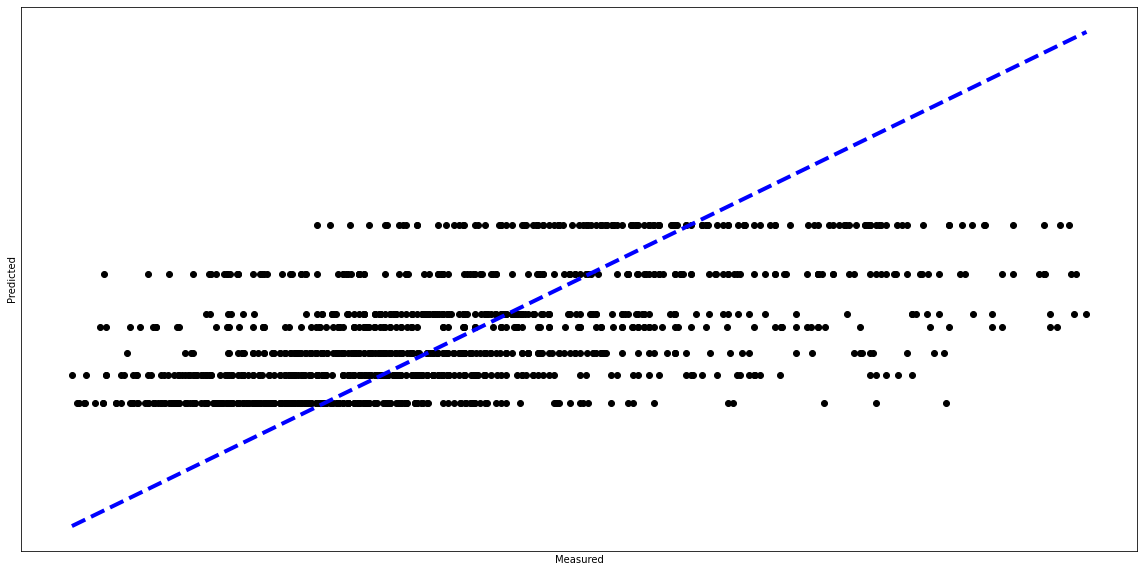

In [74]:
# Plot outputs
plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

In [75]:
import joblib
joblib.dump(dt, 'dtReg.pkl')

['dtReg.pkl']

In [ ]:
# YOUR TURN
# Use sklearn train|test|split
# Ref. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


# from sklearn.model_selection import train_test_split


# Init x, y test,train @ 33% size (sklearn)


# Determine linear_model (sklearn - above))


# Train linear_model (sklearn)


# Score Method 1: (sklearn)
# Ref. https://stackoverflow.com/questions/45529907/difference-between-model-score-vs-r2-score
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


# Explained variance score: 1 is perfect prediction


# Score Method 2 (sklearn)


# Plot outputs (matplotlab - above)

# Download model as pkl file


In [154]:
from sklearn.model_selection import train_test_split

In [166]:
# Init x, y test,train @ 33% size (sklearn)
split = int(len(filter_data) * 0.33)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]

In [156]:
# Determine linear_model (sklearn - above))
regr = linear_model.LinearRegression()

['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']

### 7. Decision Tree

In [ ]:
# YOUR TURN
# Run DecisionTreeRegressor
# HINT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


# Create regressor


# Fit


# Predictions


# Score


# Plot outputs (matplotlab - above)


# Download model as pkl file


In [ ]:
# print('BED: %.2f' % metrics.mean_absolute_error(y_test, predictions))
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# from sklearn import metrics

In [ ]:
**/.ipybyv_checjpoints 

### Ref
    + https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame